In [0]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [0]:
def analitical(v,teta):
  
  t_total = (2 * v * math.sin(math.radians(teta)))/9.8
  t_arr = np.arange(0,t_total, 0.01)

  x = v * math.cos(math.radians(teta)) * t_total
  x_arr = v * t_arr * math.cos(math.radians(teta))

  y = v**2 * (math.sin(math.radians(teta)))**2/(2*-9.8)
  y_arr = v * t_arr * math.sin(math.radians(teta)) - (1/2 * 9.8 * (t_arr)**2)

  return x_arr, y_arr, t_total

In [0]:
def numerik_tanpa_hambatanudara(v,teta, time_step):
  x_arr = []
  y_arr = []
  t = 0
  x = 0
  y = 0
  a = -9.8

  vx = v * math.cos(math.radians(teta))
  vy = v * math.sin(math.radians(teta))

  while 1:
    x_arr.append(x)
    y_arr.append(y)
    t += time_step

    vy = vy + (a*time_step)

    x = x + (vx*time_step)
    y = y + (vy*time_step)

    if( y < 0):
      break
  
  return x_arr,y_arr

In [0]:
def numerik_dengan_gesekanudara(v, teta, time_step):
  x_arr = []
  y_arr = []
  t = 0
  x = 0
  y = 0
  D = 0.0013
  m = 0.15
  g = 9.8
  
  vx = v * math.cos(math.radians(teta))
  vy = v * math.sin(math.radians(teta))

  ax = -(D/m)*v*vx
  ay = -g - (D/m)*v*vy

  while 1:
    x_arr.append(x)
    y_arr.append(y)
    t += time_step

    vx = vx + (ax*time_step)
    vy = vy + (ay*time_step)

    v = ((vx**2)+(vy**2))**(1/2)

    x = x + (vx*time_step)
    y = y + (vy*time_step)

    ax = -(D/m)*v*vx
    ay = -g - (D/m)*v*vy

    if( y < 0):
      break
  
  return x_arr,y_arr

In [0]:
x_arr, y_arr, ttot = analitical(50,35)
x,y = numerik_tanpa_hambatanudara(50,35,0.01)
a,b = numerik_dengan_gesekanudara(50,35,0.01)

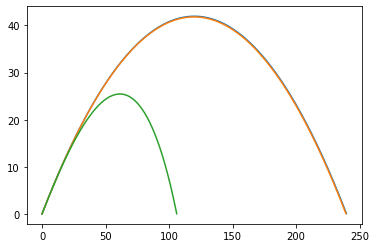

In [0]:
plt.plot(x_arr,y_arr)
plt.plot(x,y)
plt.plot(a,b)